In [1]:
from dask.distributed import Client, LocalCluster

# Connect to an existing LocalCluster if available
# The default port is 8786
try:
    # This creates a new Client connection to an existing Dask scheduler if one exists.
    # There is no practical way to get the LocalCluster object from the existing scheduler,
    # although the scheduler details can be accessed with `client.scheduler`.
    # The LocalCluster object is only available from the notebook that created it.
    # Restart the kernel or `client.close();cluster.close()` in each notebook that
    # created one to remove existing LocalClusters.
    client = Client(f'localhost:8786', timeout='2s')
    cluster = client.cluster  # None
except:
    cluster = LocalCluster(scheduler_port=8786)
    client = Client(cluster)

display(cluster if cluster else client)

In [2]:
# Initiliaze the Gateway client
from dask.distributed import Client
from dask_gateway import Gateway

gateway = Gateway()
gateway.cluster_options()

In [3]:
clusters = gateway.list_clusters()
if not clusters:
    print('Creating new cluster. Please wait for this to finish.')
    cluster = gateway.new_cluster()
else:
    print(f'An existing cluster was found. Connecting to: {clusters[0].name}')
    cluster=gateway.connect(clusters[0].name)
display(cluster)

Creating new cluster. Please wait for this to finish.


In [4]:
min_number_of_workers = 1
max_number_of_workers = 4

# Static scaling
cluster.scale(min_number_of_workers)

# Adaptive scaling
cluster.adapt(minimum=min_number_of_workers, maximum=max_number_of_workers)

In [5]:
client = cluster.get_client()
client.wait_for_workers(n_workers=min_number_of_workers)
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: https://hub.csiro.easi-eo.solutions/services/dask-gateway/clusters/easihub.5c0769bfd4bf49789d9b7b3273088403/status,


In [6]:
# import pandas
import pandas as pd

# read the dataset
data = pd.read_csv("WHONDRS_collaboration/EDA/all.csv") 

data

,sample_id,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,...,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,SED,SW,D,M,U
0,SED_S19S.0001_D_Field,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,SED_S19S.0001_M_Field,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,SED_S19S.0001_U_Field,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
3,SED_S19S.0003_D_Field,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,SED_S19S.0003_M_Field,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,SW_S19S.0099_U_1,1,0,1,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
500,SW_S19S.0099_U_2,1,0,1,0,1,1,0,1,0,...,1,1,1,0,1,0,1,0,0,1
501,SW_S19S.0099_U_3,1,0,1,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,1
502,SW_S19S.0100_U_1,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [7]:
# drop the first two columns to create data body ie the molecules' presence/absence
# colsdrop = ['SED', 'SW', 'D', 'M', 'U']
databody = data.drop(labels=['sample_id', 'SED', 'SW', 'D', 'M', 'U'], axis=1) 

databody



,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,C10H11O6N,...,C9H14O5S,C9H14O6S,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N
0,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1,0,1,0,1,1,0,1,0,1,...,1,1,1,0,0,0,1,0,0,1
500,1,0,1,0,1,1,0,1,0,1,...,1,1,1,0,0,1,1,1,0,1
501,1,0,1,0,1,1,0,1,0,1,...,1,1,1,0,0,0,0,1,0,1
502,1,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
target = data[['SED', 'SW', 'D', 'M', 'U']] 

target


,SED,SW,D,M,U
0,1,0,1,0,0
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,1,0,0
4,1,0,0,1,0
...,...,...,...,...,...
499,0,1,0,0,1
500,0,1,0,0,1
501,0,1,0,0,1
502,0,1,0,0,1


scaled_features[col_names] = features
print(scaled_features)

In [9]:
"deactivate once done - double ## hash key"
# split train test data 80/20 ratio
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.20, random_state=42)
train

,sample_id,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,...,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,SED,SW,D,M,U
75,SED_S19S.0032_U_Field,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,1
442,SW_S19S.0076_U_1,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
15,SED_S19S.0010_U_Field,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
325,SW_S19S.0034_U_3,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
388,SW_S19S.0057_U_3,1,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,SED_S19S.0044_M_Field,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
270,SW_S19S.0013_U_3,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
348,SW_S19S.0043_U_1,1,0,1,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
435,SW_S19S.0073_U_3,1,0,1,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1


In [10]:
"deactivate once done - double ## hash key"
# export the training and test data in csv

train.to_csv("train_sedtype.csv", index=False)
test.to_csv("test_sedtype.csv", index=False)

In [11]:
# drop target columns, keep training data columns 

X_train = train[['SED', 'SW', 'D', 'M', 'U']] 

X_train

,SED,SW,D,M,U
75,1,0,0,0,1
442,0,1,0,0,1
15,1,0,0,0,1
325,0,1,0,0,1
388,0,1,0,0,1
...,...,...,...,...,...
106,1,0,0,1,0
270,0,1,0,0,1
348,0,1,0,0,1
435,0,1,0,0,1


In [12]:
# trop target columns, keep training data columns

y_train = train.drop(labels=['sample_id', 'SED', 'SW', 'D', 'M', 'U'], axis=1).astype(float)
y_train

,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,C10H11O6N,...,C9H14O5S,C9H14O6S,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N
75,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
15,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
348,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
435,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [13]:
X_test = test[['SED', 'SW', 'D', 'M', 'U']] 

X_test

,SED,SW,D,M,U
173,1,0,0,1,0
274,0,1,0,0,1
489,0,1,0,0,1
72,1,0,0,0,1
305,0,1,0,0,1
...,...,...,...,...,...
331,0,1,0,0,1
411,0,1,0,0,1
502,0,1,0,0,1
349,0,1,0,0,1


In [14]:

y_test = test.drop(labels=['sample_id', 'SED', 'SW', 'D', 'M', 'U'], axis=1).astype(float)
y_test

,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,C10H11O6N,...,C9H14O5S,C9H14O6S,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N
173,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
489,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
502,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# from skmultilearn.problem_transform import BinaryRelevance
import time
import joblib

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = RandomForestClassifier()

"""classifier = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True] 
)"""

# running computation with dask https://www.codegrepper.com/code-examples/python/dask-ml+random+forest
with joblib.parallel_backend('dask'):
    rf_fitted = classifier.fit(X_train, y_train)
    
scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=-1)


print("training time taken: ", round(time.time() - start, 0), "seconds")


/home/jovyan/virtenvs/myenv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


training time taken:  139.0 seconds


In [39]:
print("CV accuracy scores: %s" % scores)
print("CV accuracy:%.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CV accuracy:0.000 +/- 0.000


In [35]:
test_pred = classifier.predict(X_test)

test_pred

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [36]:
imp1 = pd.Series(rf_fitted.feature_importances_, index=X_train.columns).nlargest(35)

imp1

SED    0.439908
SW     0.388252
U      0.123174
M      0.029322
D      0.019345
dtype: float64

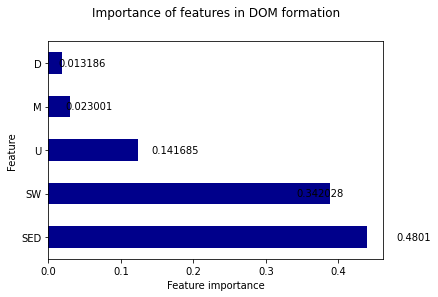

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
import numpy as np

FI = (
    pd.Series(rf_fitted.feature_importances_, index=X_train.columns)
    .nlargest(25)
    .plot(kind="barh", color="darkblue")
)

plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Importance of features in DOM formation", pad=25)

# bar labelling guide https://stackoverflow.com/questions/52182746/matplotlib-horizontal-bar-plot-add-values-to-bars
for i, v in enumerate(imp):
    plt.text(v + 0.0001, i, str(round(v, 6)), color="black", va="center")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("featureimp.pdf", dpi=500, bbox_inches='tight')

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

0.0